# Random Forest Tutorial

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('loan_data.csv')
df

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


In [3]:
df.corr()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
credit.policy,1.000000,-0.294089,0.058770,0.034906,-0.090901,0.348319,0.099026,-0.187518,-0.104095,-0.535511,-0.076318,-0.054243,-0.158119
int.rate,-0.294089,1.000000,0.276140,0.056383,0.220006,-0.714821,-0.124022,0.092527,0.464837,0.202780,0.156079,0.098162,0.159552
installment,0.058770,0.276140,1.000000,0.448102,0.050202,0.086039,0.183297,0.233625,0.081356,-0.010419,-0.004368,-0.032760,0.049955
log.annual.inc,0.034906,0.056383,0.448102,1.000000,-0.054065,0.114576,0.336896,0.372140,0.054881,0.029171,0.029203,0.016506,-0.033439
dti,-0.090901,0.220006,0.050202,-0.054065,1.000000,-0.241191,0.060101,0.188748,0.337109,0.029189,-0.021792,0.006209,0.037362
fico,0.348319,-0.714821,0.086039,0.114576,-0.241191,1.000000,0.263880,-0.015553,-0.541289,-0.185293,-0.216340,-0.147592,-0.149666
days.with.cr.line,0.099026,-0.124022,0.183297,0.336896,0.060101,0.263880,1.000000,0.229344,-0.024239,-0.041736,0.081374,0.071826,-0.029237
revol.bal,-0.187518,0.092527,0.233625,0.372140,0.188748,-0.015553,0.229344,1.000000,0.203779,0.022394,-0.033243,-0.031010,0.053699
revol.util,-0.104095,0.464837,0.081356,0.054881,0.337109,-0.541289,-0.024239,0.203779,1.000000,-0.013880,-0.042740,0.066717,0.082088
inq.last.6mths,-0.535511,0.202780,-0.010419,0.029171,0.029189,-0.185293,-0.041736,0.022394,-0.013880,1.000000,0.021245,0.072673,0.149452


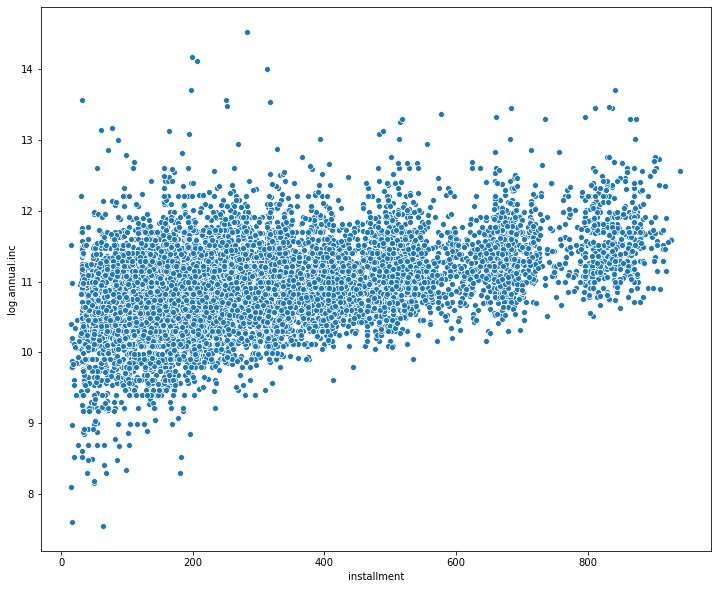

In [4]:
fig = plt.figure(figsize=(12,10))
sns.scatterplot(df['installment'],df['log.annual.inc'])

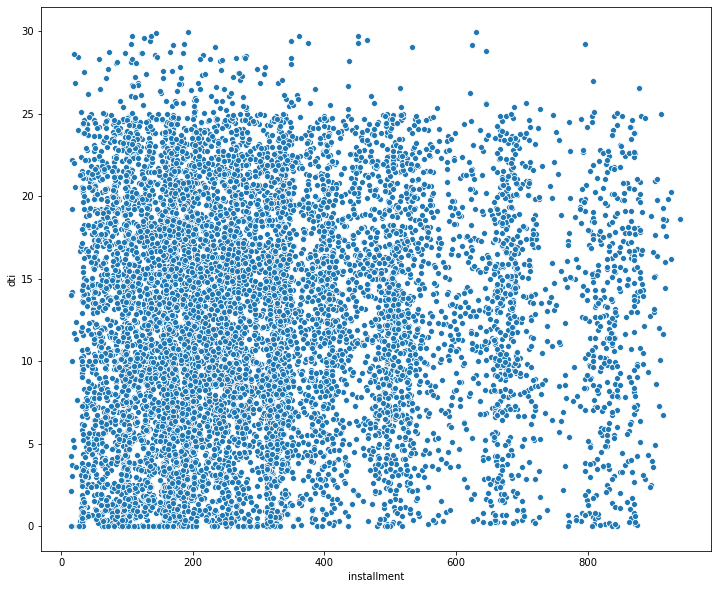

In [5]:
fig = plt.figure(figsize=(12,10))
sns.scatterplot(df['installment'],df['dti'])

In [7]:
df_real = pd.get_dummies(df,drop_first=True)
df_real

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,0,0,0,0,0,0
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,0,0,0,0,0,0
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1,0,1,0,0,0,0
9576,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1,0,0,0,1,0,0


In [8]:
from sklearn.model_selection import train_test_split

In [12]:
X =df_real.drop(['not.fully.paid'],axis=1)
y = df_real['not.fully.paid']

In [13]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=10)

In [14]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(7183, 18)
(2395, 18)
(7183,)
(2395,)


#  Default

In [15]:
from sklearn.ensemble import RandomForestClassifier

In [16]:
rf = RandomForestClassifier()

In [17]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [18]:
predicted = rf.predict(x_test)

In [20]:
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,precision_score,recall_score

In [21]:
confusion_matrix(y_test,predicted)

array([[2007,    4],
       [ 378,    6]], dtype=int64)

In [23]:
print('Acc:', accuracy_score(y_test,predicted))
print('F1-Score:',f1_score(y_test,predicted))
print('Precision :',precision_score(y_test,predicted))
print('Recall :',recall_score(y_test,predicted))

Acc: 0.8405010438413362
F1-Score: 0.030456852791878174
Precision : 0.6
Recall : 0.015625


# Normalization

In [24]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=10)

In [25]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
min_max_scaler = MinMaxScaler()
min_max_scaler2 = MinMaxScaler()

In [27]:
x_train = min_max_scaler.fit_transform(x_train)

In [28]:
x_train

array([[1.        , 0.41751918, 0.70706459, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.1112532 , 0.2025593 , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.64897698, 0.17360217, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.        , 0.12787724, 0.15254146, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.50191816, 0.72085627, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.39769821, 0.19209926, ..., 0.        , 0.        ,
        0.        ]])

In [29]:
df_real.drop(['not.fully.paid'],axis=1).columns

Index(['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti',
       'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_major_purchase',
       'purpose_small_business'],
      dtype='object')

In [31]:
x_train = pd.DataFrame(x_train,columns=df_real.drop(['not.fully.paid'],axis=1).columns)
x_train

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1.0,0.417519,0.707065,0.432444,0.592988,0.511628,0.176854,0.015454,0.628169,0.00000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.111253,0.202559,0.506903,0.426377,0.744186,0.400378,0.002427,0.030986,0.00000,0.153846,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.648977,0.173602,0.481014,0.813356,0.186047,0.412350,0.008615,0.769014,0.09375,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.402174,0.026350,0.380956,0.255092,0.232558,0.048167,0.001980,0.935211,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.422634,0.230424,0.511149,0.788648,0.465116,0.415846,0.076969,0.917371,0.00000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7178,0.0,0.972506,0.187415,0.490974,0.012020,0.232558,0.199363,0.000481,0.113615,0.15625,0.153846,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7179,1.0,0.295396,0.863554,0.528847,0.411352,0.674419,0.359148,0.020220,0.419718,0.00000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7180,1.0,0.127877,0.152541,0.486070,0.359933,0.674419,0.171869,0.003724,0.091080,0.09375,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7181,1.0,0.501918,0.720856,0.650362,0.306511,0.372093,0.326845,0.010742,0.699531,0.06250,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [33]:
x_test = min_max_scaler2.fit_transform(x_test)
x_test = pd.DataFrame(x_test,columns=df_real.drop(['not.fully.paid'],axis=1).columns)
x_test

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1.0,0.276134,0.521193,0.461642,0.429573,0.682927,0.321744,0.029191,0.263025,0.060606,0.2,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.449704,0.654018,0.609976,0.256676,0.512195,0.174178,0.009282,0.661345,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.131492,0.139061,0.436694,0.047730,0.756098,0.043010,0.002077,0.197479,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.491124,0.208430,0.466002,0.675901,0.439024,0.058495,0.004547,0.269748,0.030303,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.491124,0.240419,0.661323,0.387850,0.365854,0.168615,0.021351,0.429412,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2390,0.0,0.537804,0.476844,0.490940,0.631842,0.268293,0.064118,0.034942,0.436975,0.151515,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2391,0.0,0.366864,0.070512,0.430127,0.652203,0.560976,0.173776,0.000527,0.225210,0.151515,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2392,0.0,0.406312,0.049098,0.471297,0.344126,0.487805,0.175497,0.003244,0.231092,0.151515,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2393,1.0,0.114398,0.218139,0.608838,0.163551,0.731707,0.237436,0.024159,0.164706,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [34]:
rf2 = RandomForestClassifier()
rf2.fit(x_train,y_train)

RandomForestClassifier()

In [35]:
predicted2 = rf2.predict(x_test)

In [36]:
confusion_matrix(y_test,predicted2)

array([[2000,   11],
       [ 375,    9]], dtype=int64)

In [37]:
print('Acc:', accuracy_score(y_test,predicted2))
print('F1-Score:',f1_score(y_test,predicted2))
print('Precision :',precision_score(y_test,predicted2))
print('Recall :',recall_score(y_test,predicted2))

Acc: 0.838830897703549
F1-Score: 0.04455445544554456
Precision : 0.45
Recall : 0.0234375


# Standardization

In [39]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=10)

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
sc = StandardScaler()
sc2 = StandardScaler()

In [43]:
x_train = sc.fit_transform(x_train)
x_train = pd.DataFrame(x_train,columns=df_real.drop(['not.fully.paid'],axis=1).columns)
x_train

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,0.496604,0.091502,1.708724,-0.552878,0.740522,0.306679,-0.511398,0.058392,0.691283,-0.720035,-0.297445,-0.235403,-0.390877,1.192042,-0.194951,-0.263998,-0.215579,-0.258525
1,0.496604,-1.693291,-0.561231,0.289106,0.014761,1.625291,1.047714,-0.402760,-1.501216,-0.720035,3.314639,-0.235403,-0.390877,-0.838897,-0.194951,-0.263998,-0.215579,-0.258525
2,-2.013676,1.440344,-0.691520,-0.003640,1.700448,-1.539378,1.131219,-0.183678,1.208381,0.633777,-0.297445,-0.235403,-0.390877,1.192042,-0.194951,-0.263998,-0.215579,-0.258525
3,-2.013676,0.002077,-1.354060,-1.135094,-0.731363,-1.275656,-1.409005,-0.418563,1.818558,-0.720035,-0.297445,-0.235403,-0.390877,-0.838897,-0.194951,-0.263998,-0.215579,-0.258525
4,-2.013676,0.121311,-0.435858,0.337119,1.592820,0.042956,1.155604,2.236047,1.753059,-0.720035,-0.297445,-0.235403,-0.390877,1.192042,-0.194951,-0.263998,-0.215579,-0.258525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7178,-2.013676,3.325741,-0.629368,0.108980,-1.790190,-1.275656,-0.354390,-0.471633,-1.197851,1.536318,3.314639,-0.235403,-0.390877,-0.838897,-0.194951,-0.263998,-0.215579,3.868103
7179,0.496604,-0.620179,2.412829,0.537248,-0.050689,1.229707,0.760129,0.227131,-0.074023,-0.720035,-0.297445,-0.235403,2.558353,-0.838897,-0.194951,-0.263998,-0.215579,-0.258525
7180,0.496604,-1.596413,-0.786280,0.053528,-0.274672,1.229707,-0.546169,-0.356844,-1.280587,0.633777,-0.297445,-0.235403,-0.390877,1.192042,-0.194951,-0.263998,-0.215579,-0.258525
7181,0.496604,0.583345,1.770778,1.911336,-0.507381,-0.484489,0.534812,-0.108383,0.953279,0.182506,-0.297445,-0.235403,-0.390877,1.192042,-0.194951,-0.263998,-0.215579,-0.258525


In [45]:
x_test = sc2.fit_transform(x_test)
x_test = pd.DataFrame(x_test,columns=df_real.drop(['not.fully.paid'],axis=1).columns)
x_test

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,0.479026,-0.745644,0.773538,-0.977036,0.064997,1.043231,0.479867,-0.085689,-0.528994,0.221674,1.604671,-0.241768,2.593416,-0.839420,-0.185896,-0.268455,-0.227646,-0.275538
1,0.479026,0.237250,1.338879,0.454948,-0.685242,0.124168,-0.559002,-0.395887,1.103962,-0.708115,-0.307362,-0.241768,-0.385592,1.191298,-0.185896,-0.268455,-0.227646,-0.275538
2,-2.087568,-1.564721,-0.852919,-1.217875,-1.591903,1.437114,-1.482428,-0.508144,-0.797708,-0.708115,-0.307362,-0.241768,-0.385592,-0.839420,-0.185896,-0.268455,-0.227646,-0.275538
3,0.479026,0.471804,-0.557663,-0.934943,1.133872,-0.269716,-1.373412,-0.469664,-0.501433,-0.243220,-0.307362,-0.241768,-0.385592,-0.839420,-0.185896,-0.268455,-0.227646,-0.275538
4,0.479026,0.471804,-0.421511,0.950636,-0.116045,-0.663600,-0.598167,-0.207834,0.153127,-0.708115,-0.307362,-0.241768,-0.385592,-0.839420,-0.185896,3.725020,-0.227646,-0.275538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2390,-2.087568,0.736142,0.584777,-0.694200,0.942691,-1.188778,-1.333826,0.003914,0.184132,1.616357,-0.307362,-0.241768,-0.385592,1.191298,-0.185896,-0.268455,-0.227646,-0.275538
2391,-2.087568,-0.231858,-1.144680,-1.281267,1.031040,0.386757,-0.561829,-0.532297,-0.684021,1.616357,-0.307362,-0.241768,-0.385592,-0.839420,-0.185896,-0.268455,-0.227646,-0.275538
2392,-2.087568,-0.008474,-1.235826,-0.883828,-0.305777,-0.007127,-0.549716,-0.489960,-0.659906,1.616357,-0.307362,-0.241768,-0.385592,1.191298,-0.185896,-0.268455,-0.227646,-0.275538
2393,0.479026,-1.661521,-0.516340,0.443958,-1.089329,1.305820,-0.113667,-0.164088,-0.932065,-0.708115,-0.307362,-0.241768,-0.385592,1.191298,-0.185896,-0.268455,-0.227646,-0.275538


In [47]:
rf3 = RandomForestClassifier()
rf3.fit(x_train,y_train)

RandomForestClassifier()

In [51]:
predicted3 = rf3.predict(x_test)

In [52]:
confusion_matrix(y_test,predicted)

array([[2008,    3],
       [ 381,    3]], dtype=int64)

In [53]:
# Standardization
print('Acc:', accuracy_score(y_test,predicted3))
print('F1-Score:',f1_score(y_test,predicted3))
print('Precision :',precision_score(y_test,predicted3))
print('Recall :',recall_score(y_test,predicted3))

Acc: 0.8396659707724425
F1-Score: 0.015384615384615385
Precision : 0.5
Recall : 0.0078125


# Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV